In [144]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [96]:
df_nonoverlapping_01 = pd.read_csv('../data/nonoverlapping/img_0_1.csv', index_col=0)
df_nonoverlapping_012 = pd.read_csv('../data/nonoverlapping/img_0_1_2.csv', index_col=0)
df_overlapping_01 = pd.read_csv('../data/overlapping/image01.csv', index_col=0)
df_overlapping_012 = pd.read_csv('../data/overlapping/image012.csv', index_col=0)

In [97]:
df_overlapping_012.iloc[:,:64]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
feature vector 1604,221,220,222,218,219,220,220,219,222,222,...,219,218,221,221,221,221,221,219,221,220
feature vector 301,215,219,219,217,216,216,215,215,214,219,...,219,221,217,217,214,215,217,216,217,220
feature vector 3362,171,170,170,170,170,170,170,170,171,170,...,171,171,170,171,171,171,171,171,170,171
feature vector 1927,95,96,97,100,101,102,105,107,94,96,...,105,106,96,99,100,101,102,104,106,107
feature vector 2428,188,188,187,187,187,188,188,188,189,189,...,188,189,189,189,189,189,189,189,189,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature vector 2236,199,199,199,200,200,200,200,201,200,199,...,199,199,199,198,197,200,199,198,199,200
feature vector 439,190,190,190,190,190,190,190,190,190,190,...,191,191,190,190,190,191,191,191,191,191
feature vector 430,221,222,222,223,223,223,223,223,220,221,...,222,222,219,219,219,223,223,222,221,222
feature vector 1076,222,220,219,221,221,221,222,222,221,220,...,222,218,220,218,218,220,221,221,220,221


In [103]:
#helper function

#generate train test split
def gen_train_test(df):
    x = df.iloc[:,:64]
    y = df['label']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
    return x_train, x_test, y_train, y_test

#generate label
def gen_label_en(df):  
    df['img'] = df['img'].astype(str)
    label = preprocessing.LabelEncoder()
    df['label'] = label.fit_transform(df['img'].values.tolist())
    return df

#generate histogram
def gen_histo(df, col1:str, col2:str, title:str):
    fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
    axs[0].hist(df[col1])
    axs[0].title.set_text(str(title+" feature: "+col1))
    axs[1].hist(df[col2])
    axs[1].title.set_text(str(title+" feature: "+col2))
    fig.tight_layout()
    return plt.show()
    

In [104]:
df_nonoverlapping_01 = gen_label_en(df_nonoverlapping_01)
df_nonoverlapping_012 = gen_label_en(df_nonoverlapping_012)
df_overlapping_01 = gen_label_en(df_overlapping_01)
df_overlapping_012 = gen_label_en(df_overlapping_012)

In [105]:
x_train_nonover_01, x_test_nonover_01, y_train_nonover_01, y_test_nonover_01 = gen_train_test(df_nonoverlapping_01)
x_train_nonover_012, x_test_nonover_012, y_train_nonover_012, y_test_nonover_012 = gen_train_test(df_nonoverlapping_012)
x_train_over_01, x_test_over_01, y_train_over_01, y_test_over_01 = gen_train_test(df_overlapping_01)
x_train_over_012, x_test_over_012, y_train_over_012, y_test_over_012 = gen_train_test(df_overlapping_012)

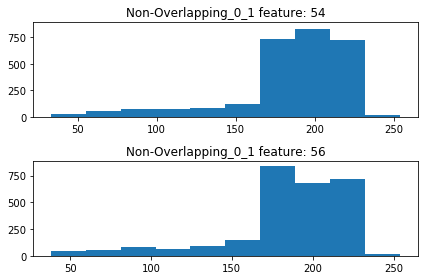

In [165]:
gen_histo(df_nonoverlapping_01, '54', '56', 'Non-Overlapping_0_1')

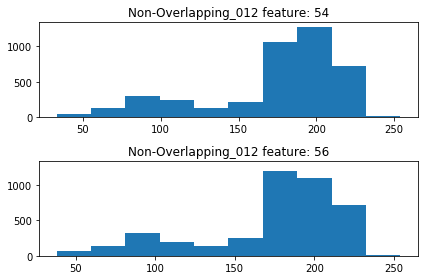

In [166]:
gen_histo(df_nonoverlapping_012, '54', '56', 'Non-Overlapping_012')

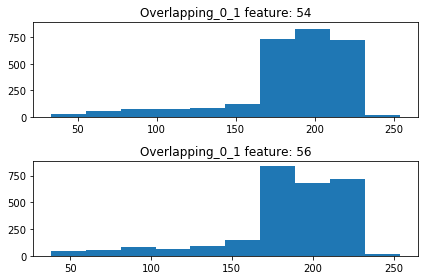

In [167]:
gen_histo(df_nonoverlapping_01, '54', '56', 'Overlapping_0_1')

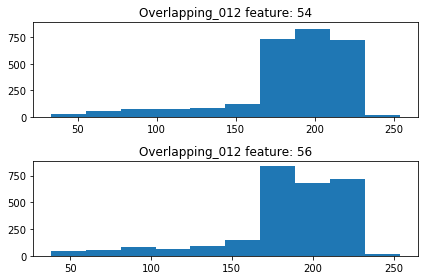

In [168]:
gen_histo(df_nonoverlapping_01, '54', '56', 'Overlapping_012')

In [211]:
#function for feature selection
def feature_selection(x_train, y_train, x_test):
    sel = SelectFromModel(SGDClassifier(max_iter=1000, tol=1e-3,loss="log", penalty="elasticnet"))
    sel.fit(x_train, y_train)
    x_train_rcf = sel.transform(x_train)
    x_test_rcf = sel.transform(x_test)
    return x_train_rcf, x_test_rcf

#function to scale data
def scale_data(x_train, x_test):
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        return x_train, x_test

#elastic_classifier
def Elastic_Classifier(x_train, y_train, x_test, y_test):
    clf = SGDClassifier(max_iter=200, tol=1e-3,loss="log", penalty="elasticnet")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy : ", accuracy_score(y_test,y_pred))
    
    #display confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

    class_names = [0,1]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, x_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    plt.show()
    

### Non-Overlapping Image 1 and 0

In [212]:
x_train, x_test = feature_selection(x_train_nonover_01,y_train_nonover_01,x_test_nonover_01)
x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

Accuracy :  0.5063520871143375


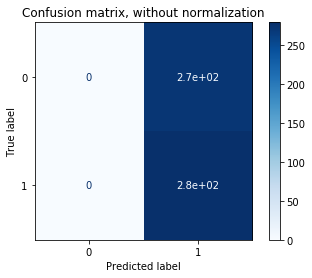

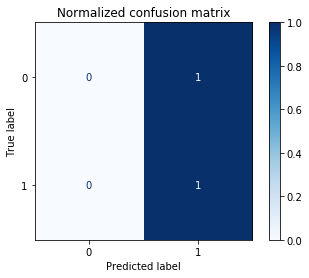

In [216]:
Elastic_Classifier(x_train, y_train_nonover_01, x_test, y_test_nonover_01)

Accuracy :  0.6515426497277677


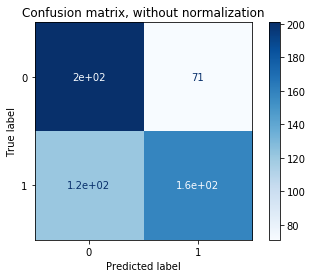

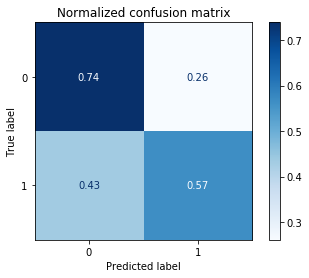

In [213]:
Elastic_Classifier(x_train_scaled, y_train_nonover_01, x_test_scaled, y_test_nonover_01)